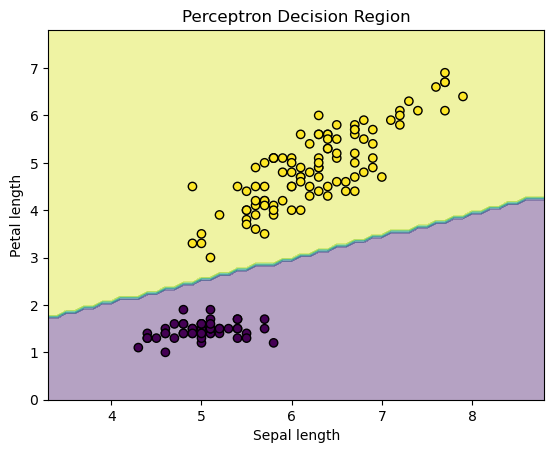

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Initialize weights
        self.errors = []  # Store misclassification errors during training
        
        for _ in range(self.num_epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def predict(self, X):
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(net_input >= 0.0, 1, -1)

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # Selecting only the first two features for visualization
y = np.where(iris.target == 0, -1, 1)  # Convert labels to -1 and 1 for binary classification

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train perceptron model
perceptron = Perceptron(learning_rate=0.1, num_epochs=10)
perceptron.fit(X_train, y_train)

# Plot decision region
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black')

plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron Decision Region')
plt.show()
